# Spatial visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
% matplotlib inline

import shapely
from shapely.geometry import Point
import shapely.wkt
import geopandas as gpd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

C:\Users\Michal_schudnij\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan.csv")

In [3]:
df_warszawa['geometry'] = df_warszawa.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
df_warszawa = gpd.GeoDataFrame(df_warszawa, geometry = 'geometry', crs = "epsg:4258")

df_krakow['geometry'] = df_krakow.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
df_krakow = gpd.GeoDataFrame(df_krakow, geometry = 'geometry', crs = "epsg:4258")

df_poznan['geometry'] = df_poznan.apply(lambda x: shapely.wkt.loads(x['geometry']), axis=1)
df_poznan = gpd.GeoDataFrame(df_poznan, geometry = 'geometry', crs = "epsg:4258")

In [4]:
df_warszawa.head()

,grid_index,geometry,dhl,dpd,fedex,inpost,poczta,ruch,ups,tot,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
0,206436,"POLYGON ((20.85177 52.18687, 20.83728 52.18820...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,4841,...,4.0,0.0,1.0,2.0,4.0,2.0,8.0,11.0,19.0,0.0
1,206464,"POLYGON ((20.87799 52.29333, 20.86347 52.29467...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,137,...,3.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0
2,206476,"POLYGON ((20.85395 52.19574, 20.83946 52.19708...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,269,...,14.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,4.0,0.0
3,206492,"POLYGON ((20.88018 52.30220, 20.86566 52.30354...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
4,206505,"POLYGON ((20.87580 52.28446, 20.86129 52.28579...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,386,...,0.0,0.0,0.0,8.0,0.0,0.0,4.0,3.0,1.0,0.0


# Warszawa

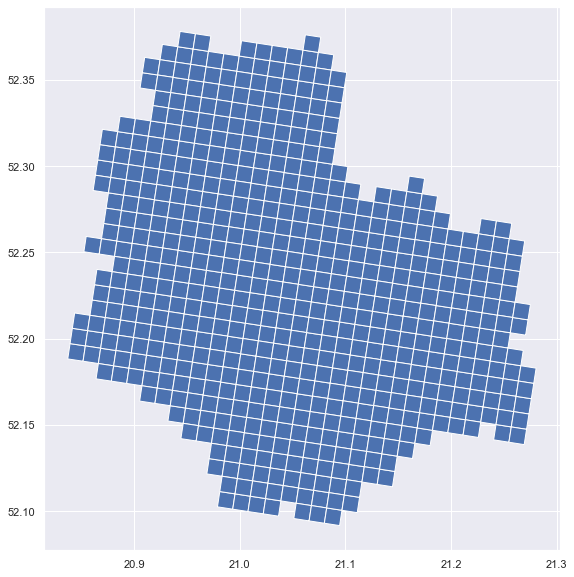

In [5]:
df_warszawa.plot(figsize=(20,10))
plt.show()

## Inpost vs Other

In [6]:
df_warszawa['other'] = df_warszawa['dhl'] + df_warszawa['dpd'] + df_warszawa['fedex'] + df_warszawa['poczta'] + df_warszawa['ruch'] + df_warszawa['ups']

In [7]:
df_warszawa['przewaga_inpost'] = df_warszawa['inpost'] > df_warszawa['other']
df_warszawa['przewaga_inpost2'] = df_warszawa['inpost'] > 1/2*df_warszawa['other']

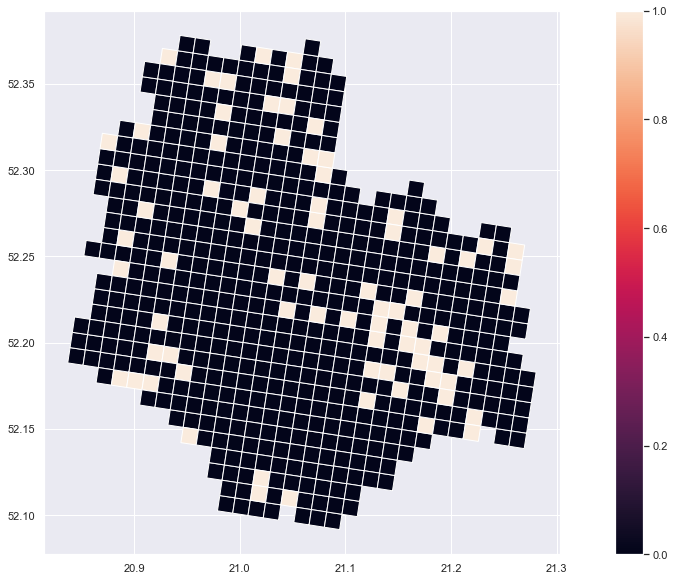

In [8]:
df_warszawa.plot(column="przewaga_inpost", legend=True, figsize=(20,10))
plt.show()

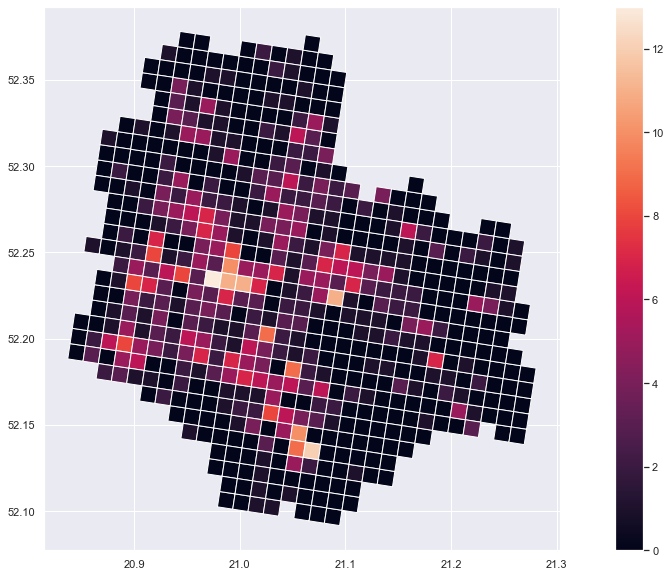

In [9]:
df_warszawa.plot(column="inpost", legend=True, figsize=(20,10))
plt.show()

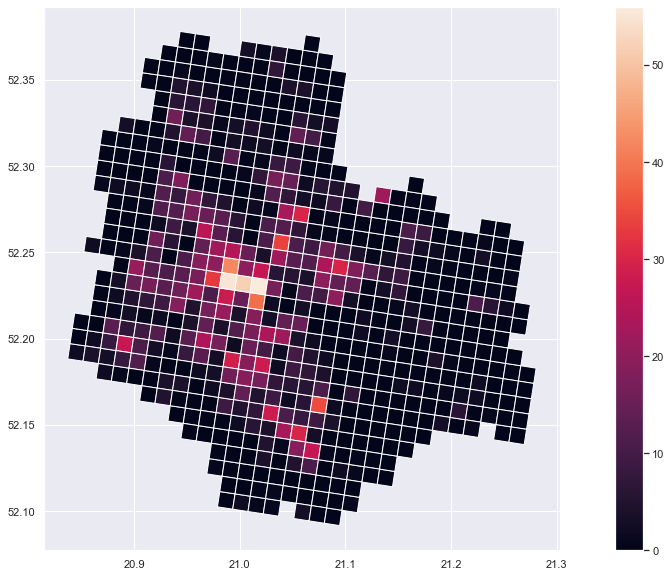

In [10]:
df_warszawa.plot(column="other", legend=True, figsize=(20,10))
plt.show()

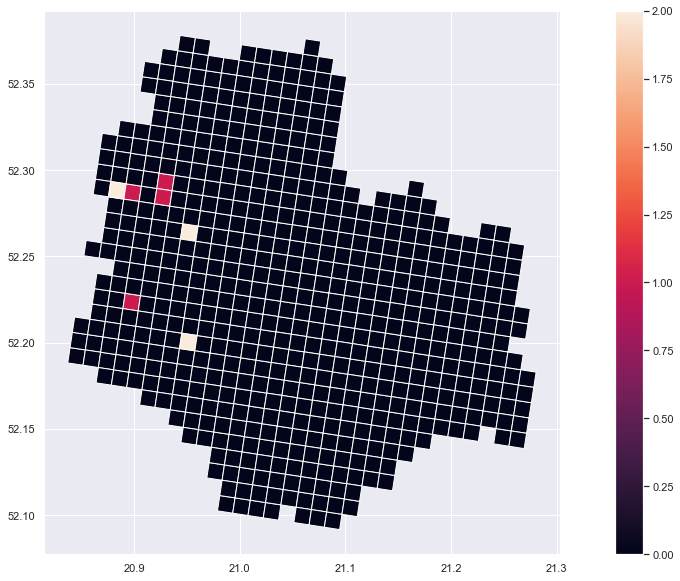

In [11]:
df_warszawa.plot(column="bus_stops", legend=True, figsize=(20,10))
plt.show()

In [38]:
# uproszczenie geometrii
mapa_gmn.geometry = mapa_gmn.geometry.simplify(0.005) # mniejsza wartosc = bardziej dokładnie
 
# dane do GeOJSON na potrzeby Folium
gmn_geoPath = mapa_gmn.to_json()

In [30]:
import folium

In [28]:
gmn_geoPath = df_warszawa.to_json()

In [34]:
df_warszawa.head()

,grid_index,geometry,dhl,dpd,fedex,inpost,poczta,ruch,ups,tot,...,forests,schools,railways,cycleways,parkings,crossings,bus_stops,other,przewaga_inpost,przewaga_inpost2
0,206436,"POLYGON ((20.85177 52.18687, 20.83728 52.18820...",0.0,0.0,0.0,0.0,1.0,0.0,1.0,4841,...,2.0,4.0,2.0,8.0,11.0,19.0,0.0,2.0,False,False
1,206464,"POLYGON ((20.87799 52.29333, 20.86347 52.29467...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,137,...,7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,False,False
2,206476,"POLYGON ((20.85395 52.19574, 20.83946 52.19708...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,269,...,0.0,0.0,8.0,0.0,2.0,4.0,0.0,0.0,False,False
3,206492,"POLYGON ((20.88018 52.30220, 20.86566 52.30354...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,206505,"POLYGON ((20.87580 52.28446, 20.86129 52.28579...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,386,...,8.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0,False,False


In [54]:
# 52,19 to w przybliżeniu środek mapy w postaci lat,long
mapa = folium.Map([52.2, 21], zoom_start=11)
 
folium.Choropleth(geo_data=gmn_geoPath,
                  data=df_warszawa,
                  columns=['grid_index', 'przewaga_inpost'],
                  key_on='feature.properties.grid_index',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Liczba paczkomatów").add_to(mapa)
 
# zapisanie utworzonej mapy do pliku HTML
# mapa.save(outfile = 'bezrobocie_gminy.html')
 
# pokazujemy mapę
mapa

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
